In [4]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'd:\Document files\Tai lieu hoc tap\KHTN\N\CNM\deadlines\machine-learning\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [5]:
import math 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# %matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout, SimpleRNN
import os

In [6]:

df = pd.read_csv('../input/XPEV.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-08-27,23.100000,25.000000,21.200001,21.219999,21.219999,82219700
1,2020-08-28,23.980000,24.400000,22.020000,22.790001,22.790001,44847300
2,2020-08-31,22.690001,22.790001,20.330000,20.500000,20.500000,20816000
3,2020-09-01,20.980000,21.790001,20.100000,21.610001,21.610001,15291400
4,2020-09-02,21.990000,22.000000,20.379999,21.090000,21.090000,9090100
...,...,...,...,...,...,...,...
225,2021-07-21,41.619999,44.419998,41.365002,43.869999,43.869999,18107800
226,2021-07-22,43.549999,43.950001,42.660000,43.270000,43.270000,6905400
227,2021-07-23,41.990002,42.078999,39.720001,41.000000,41.000000,11451900
228,2021-07-26,39.610001,43.020000,39.410000,40.750000,40.750000,12341200


In [7]:
# get the number of rows and columns in the data set
df.shape

(230, 7)

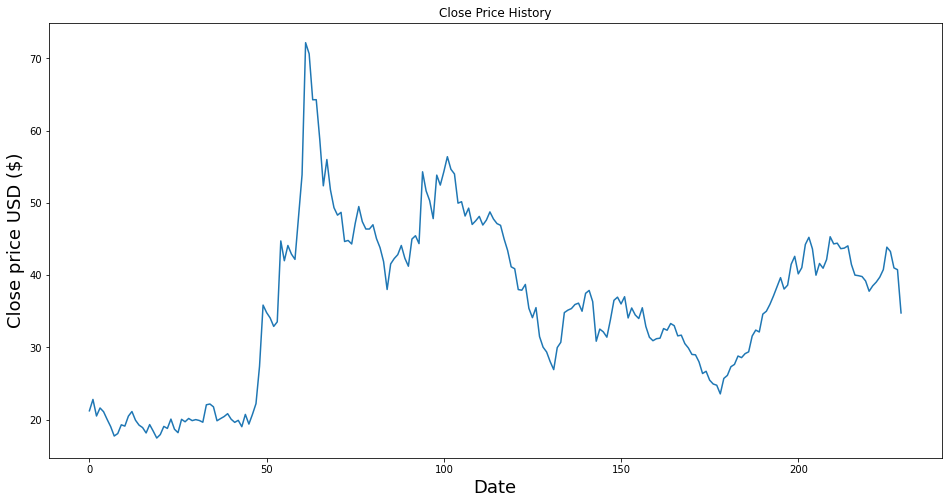

In [8]:
# visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close price USD ($)', fontsize=18)
plt.show()

In [9]:
# create a new df with only the "close" column
data = df.filter({'Close'})
# convert the df to a numpy array
dataset = data.values
# get the number of rows to train the model on
training_data_len = math.ceil(len(dataset)*.8)
training_data_len

184

In [10]:
# scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data


array([[0.06889617],
       [0.09758772],
       [0.05573829],
       [0.0760234 ],
       [0.06652045],
       [0.04714913],
       [0.02887427],
       [0.00511694],
       [0.01133039],
       [0.03344298],
       [0.03015349],
       [0.05537279],
       [0.06706872],
       [0.04513887],
       [0.03271197],
       [0.02649852],
       [0.01279238],
       [0.03399119],
       [0.01754384],
       [0.        ],
       [0.00877191],
       [0.02942248],
       [0.02430556],
       [0.0478801 ],
       [0.0222953 ],
       [0.01352339],
       [0.04733187],
       [0.04111842],
       [0.04952484],
       [0.0440424 ],
       [0.04660086],
       [0.04440786],
       [0.0400219 ],
       [0.0840643 ],
       [0.08607455],
       [0.07894735],
       [0.04367688],
       [0.04915932],
       [0.0542763 ],
       [0.06158624],
       [0.04751459],
       [0.03965643],
       [0.04477338],
       [0.0286915 ],
       [0.05975874],
       [0.03527043],
       [0.05975874],
       [0.086

In [11]:
## create the training data set
# create the scaled training data set
train_data = scaled_data[0:training_data_len, :]
# split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])

print(x_train)
print(y_train)

[array([0.06889617, 0.09758772, 0.05573829, 0.0760234 , 0.06652045,
       0.04714913, 0.02887427, 0.00511694, 0.01133039, 0.03344298,
       0.03015349, 0.05537279, 0.06706872, 0.04513887, 0.03271197,
       0.02649852, 0.01279238, 0.03399119, 0.01754384, 0.        ,
       0.00877191, 0.02942248, 0.02430556, 0.0478801 , 0.0222953 ,
       0.01352339, 0.04733187, 0.04111842, 0.04952484, 0.0440424 ,
       0.04660086, 0.04440786, 0.0400219 , 0.0840643 , 0.08607455,
       0.07894735, 0.04367688, 0.04915932, 0.0542763 , 0.06158624,
       0.04751459, 0.03965643, 0.04477338, 0.0286915 , 0.05975874,
       0.03527043, 0.05975874, 0.08698827, 0.18165202, 0.33625727,
       0.31725148, 0.30372807, 0.28234652, 0.29385963, 0.49853802,
       0.44846496, 0.48702483, 0.46527779, 0.45193714, 0.56030705]), array([0.09758772, 0.05573829, 0.0760234 , 0.06652045, 0.04714913,
       0.02887427, 0.00511694, 0.01133039, 0.03344298, 0.03015349,
       0.05537279, 0.06706872, 0.04513887, 0.03271197, 0.02

In [12]:
# convert the x_train and y_train to number arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [13]:
# reshape the data, input [samples, time steps, features] which is require for LSTM
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(124, 60, 1)

In [14]:
# build the SimpleRNN model
model = Sequential()
model.add(SimpleRNN(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(SimpleRNN(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [15]:
# compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [16]:
# train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)
# model.save('../out/APPL_LSTM_1.h5')

124/124 [==============================] - 2s 10ms/step - loss: 0.0451


In [17]:
## create the testing data set
# create a new array containing scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len - 60:, :]
# create the data sets x_test nad y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [18]:
# convert the data to a numpy array
x_test = np.array(x_test)

In [19]:
# reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

In [20]:
# get the models predicted price values
# model = load_model('../out/APPL_LSTM_1.h5')
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
print(predictions)


2/2 [==============================] - 0s 5ms/step
[[38.699368]
 [42.42986 ]
 [42.6917  ]
 [43.862232]
 [43.941586]
 [45.481915]
 [44.774654]
 [47.04418 ]
 [47.6319  ]
 [51.062576]
 [52.594852]
 [52.293064]
 [55.495956]
 [53.38522 ]
 [55.368187]
 [54.664608]
 [55.851612]
 [56.84594 ]
 [55.270126]
 [56.108166]
 [59.17317 ]
 [59.286568]
 [57.9704  ]
 [57.064064]
 [57.26287 ]
 [58.076473]
 [58.15121 ]
 [56.35509 ]
 [59.515118]
 [57.328716]
 [60.224674]
 [60.273903]
 [59.30416 ]
 [58.895077]
 [55.656876]
 [54.912437]
 [55.78024 ]
 [53.989426]
 [54.35752 ]
 [54.17627 ]
 [54.81425 ]
 [55.609623]
 [55.725178]
 [56.455795]
 [56.748856]
 [55.442955]]


In [21]:
# get the rmse (root mean squared error)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

14.545331064044456

C:\Users\Hiep\AppData\Local\Temp\ipykernel_11916\3363781652.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Prediction'] = predictions


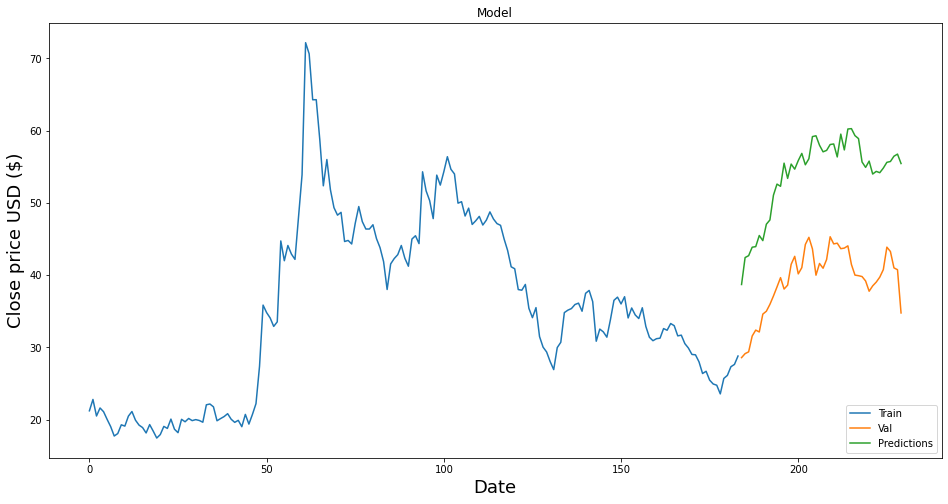

In [22]:
# plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Prediction'] = predictions
# visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Prediction']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [23]:
# show the valid and predicted prices
valid

,Close,Prediction
184,28.580000,38.699368
185,29.129999,42.429859
186,29.379999,42.691700
187,31.570000,43.862232
188,32.389999,43.941586
189,32.130001,45.481915
190,34.599998,44.774654
191,35.000000,47.044182
192,35.950001,47.631901
193,37.110001,51.062576


In [24]:
valid.index=pd.to_datetime(df['Date'].loc[training_data_len:].copy())
valid.to_csv('../out/SimpleRNN/XPEV.csv')
valid

,Close,Prediction
Date,,
2021-05-21,28.580000,38.699368
2021-05-24,29.129999,42.429859
2021-05-25,29.379999,42.691700
2021-05-26,31.570000,43.862232
2021-05-27,32.389999,43.941586
2021-05-28,32.130001,45.481915
2021-06-01,34.599998,44.774654
2021-06-02,35.000000,47.044182
2021-06-03,35.950001,47.631901
